# Zaawansowane Uczenie Maszynowe - Projekt

Tworzenie zespo≈Çu modeli klasyfikacji przez wielokrotne stosowanie dowolnego algorytmu klasyfikacji do bootstrapowych pr√≥b ze zbioru trenujƒÖcego, przy u≈ºyciu jako dodatkowych mechanizm√≥w r√≥≈ºnicowania modeli losowej selekcji podzbior√≥w atrybut√≥w oraz losowego ustalenia hiperparametr√≥w. Por√≥wnanie z wybranymi algorytmami klasyfikacji tworzƒÖcymi pojedyncze modele oraz implementacjami algorytm√≥w bagging i random forest dostƒôpnymi w ≈õrodowisku R lub Python.

Powy≈ºszy temat koncentruje siƒô na tworzeniu zespo≈Çu modeli poprzez wielokrotne trenowanie pojedynczego algorytmu na r√≥≈ºnych podzbiorach danych, uzyskanych metodƒÖ bootstrapingu. Istotnym aspektem tego rozwiƒÖzania jest wprowadzenie dodatkowej losowo≈õci, kt√≥ra ma na celu zwiƒôkszenie r√≥≈ºnorodno≈õci i uodpornienia modeli na nadmierne dopasowanie.



# Datasets Overview

W tym projekcie analizujemy trzy r√≥≈ºne zbiory danych:


# Flight Satisfaction Dataset
Zbi√≥r danych klasyfikacji binarnej zawierajƒÖcy dane o zadowoleniu pasa≈ºer√≥w z lot√≥w. Cechy obejmujƒÖ odleg≈Ço≈õƒá lotu, op√≥≈∫nienia przylotu/odlotu, oceny us≈Çug podczas lotu oraz dane demograficzne pasa≈ºer√≥w. Zmienna docelowa to zadowolenie pasa≈ºera (zadowolony/niezadowolony).

### Zbiory danych treningowych

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython.display import display
from collections import Counter
from matplotlib.colors import rgb2hex
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
# To create interactive plots
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import seaborn as sns

CURR_FILE_NAME = "test.csv" # or test.csv
TARGET_CLASS_NAME = "satisfaction"

colors = ["#0101DF", "#DF0101"]

In [ ]:

def load_data(path):
  if path is None or path == "":
    raise ValueError("Dataset path is invalid")
  elif not os.path.exists(path):
    raise FileNotFoundError(f"Dataset not found at path: {path}")

  train_path = os.path.join(path, CURR_FILE_NAME)

  return pd.read_csv(train_path)

In [ ]:
def plot_distributions(df, class_names):
  for class_name in class_names:
    df_frist_class = df[class_name]
    fig1, ax1 = plt.subplots(figsize=(9, 5))
    sns.distplot(df_frist_class.values, ax=ax1, color='r')
    ax1.set_title('Distribution of ' + class_name, fontsize=14)
    ax1.set_xlim([df_frist_class.min(), df_frist_class.max()])
    plt.show()

### Balanced airflight satisfaction



In [ ]:
df = load_data("data/raw/binary_balanced_airflight_satisfaction")

In [ ]:
#dropping id and unnamed column
df = df.drop(df.iloc[:,[0, 1]], axis = 1)

# Conver all special characters and whitespace  to underscores
df.columns = df.columns.str.replace(r'[^\w\s]', '_').str.replace(r'\s+', '_').str.lower()

df.columns

/var/folders/b_/6hg48zw14yz957yrgs4mg_xc0000gn/T/ipykernel_85068/1199417295.py:5: FutureWarning:

The default value of regex will change from True to False in a future version.

/var/folders/b_/6hg48zw14yz957yrgs4mg_xc0000gn/T/ipykernel_85068/1199417295.py:5: FutureWarning:

The default value of regex will change from True to False in a future version.



Index(['gender', 'customer_type', 'age', 'type_of_travel', 'class',
       'flight_distance', 'inflight_wifi_service',
       'departure_arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on_board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction'],
      dtype='object')

In [ ]:
categorical_indexes = [0, 1, 3, 4] + list(range(6, 20))
df.iloc[:, categorical_indexes] = df.iloc[:, categorical_indexes].astype('category')
df.info()


/var/folders/b_/6hg48zw14yz957yrgs4mg_xc0000gn/T/ipykernel_85068/3669382306.py:2: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   gender                             25976 non-null  category
 1   customer_type                      25976 non-null  category
 2   age                                25976 non-null  int64   
 3   type_of_travel                     25976 non-null  category
 4   class                              25976 non-null  category
 5   flight_distance                    25976 non-null  int64   
 6   inflight_wifi_service              25976 non-null  category
 7   departure_arrival_time_convenient  25976 non-null  category
 8   ease_of_online_booking             25976 non-null  category
 9   gate_location                      25976 non-null  category
 10  food_and_drink                     25976 non-null  category
 11  online_boarding                    25976 

In [ ]:
df.head()

gender      customer_type  age   type_of_travel     class  flight_distance  \
0  Female     Loyal Customer   52  Business travel       Eco              160   
1  Female     Loyal Customer   36  Business travel  Business             2863   
2    Male  disloyal Customer   20  Business travel       Eco              192   
3    Male     Loyal Customer   44  Business travel  Business             3377   
4  Female     Loyal Customer   49  Business travel       Eco             1182   

  inflight_wifi_service departure_arrival_time_convenient  \
0                     5                                 4   
1                     1                                 1   
2                     2                                 0   
3                     0                                 0   
4                     2                                 3   

  ease_of_online_booking gate_location  ... inflight_entertainment  \
0                      3             4  ...                      5   
1                      3             1  ...                      4   
2                      2             4  ...                      2   
3                      0             2  ...                      1   
4                      4             3  ...                      2   

  on_board_service leg_room_service baggage_handling checkin_service  \
0                5                5                5               2   
1                4                4                4               3   
2                4                1                3               2   
3                1                1                1               3   
4                2                2                2               4   

  inflight_service cleanliness departure_delay_in_minutes  \
0                5           5                         50   
1                4           5                          0   
2                2           2                          0   
3                1           4                          0   
4                2           4                          0   

  arrival_delay_in_minutes             satisfaction  
0                     44.0                satisfied  
1                      0.0                satisfied  
2                      0.0  neutral or dissatisfied  
3                      6.0                satisfied  
4                     20.0                satisfied  

[5 rows x 23 columns]

In [ ]:
df.shape

(25976, 23)

In [ ]:
#display sum of cells having null value and column name
null_counts = df.isnull().sum()
max_nulls = null_counts.max()
max_null_col = null_counts[null_counts == max_nulls].index[0] if max_nulls > 0 else "No nulls"
display(f"Maximum null values: {max_nulls} in column: {max_null_col}")
# Get null values and dataframe information
print('Null Values In DataFrame: {}\n'.format(df.isna().sum().sum()))
df.info()

'Maximum null values: 83 in column: arrival_delay_in_minutes'

Null Values In DataFrame: 83

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   gender                             25976 non-null  category
 1   customer_type                      25976 non-null  category
 2   age                                25976 non-null  int64   
 3   type_of_travel                     25976 non-null  category
 4   class                              25976 non-null  category
 5   flight_distance                    25976 non-null  int64   
 6   inflight_wifi_service              25976 non-null  category
 7   departure_arrival_time_convenient  25976 non-null  category
 8   ease_of_online_booking             25976 non-null  category
 9   gate_location                      25976 non-null  category
 10  food_and_drink                     25976 non-null  category
 11  online_boar

/var/folders/b_/6hg48zw14yz957yrgs4mg_xc0000gn/T/ipykernel_85068/4199844963.py:8: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



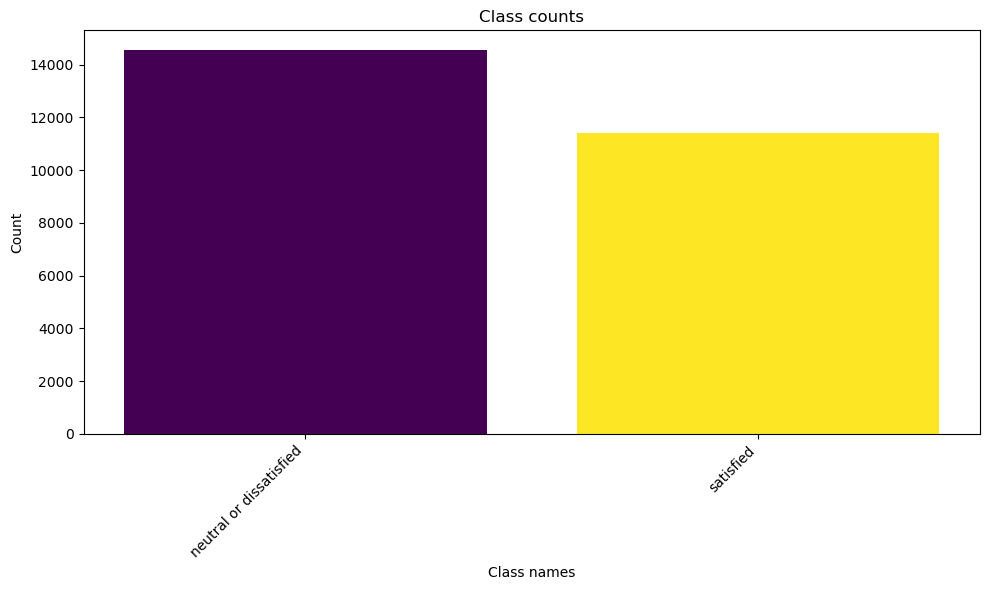

In [ ]:
label_col = df[TARGET_CLASS_NAME]

# Plotting data
label_counts = label_col.value_counts()

# Get colors
n = label_counts.shape[0]
colormap = get_cmap('viridis')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

plt.figure(figsize=(10, 6)) # Create a new figure and set its size
plt.bar(label_counts.index, label_counts.values, color=colors) # Create a bar plot
plt.title('Class counts') # Set the title of the plot
plt.xlabel('Class names') # Set the label for the x-axis
plt.ylabel('Count') # Set the label for the y-axis
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show() # Display the plot

In [ ]:
df.describe(include='all')

gender   customer_type           age   type_of_travel     class  \
count    25976           25976  25976.000000            25976     25976   
unique       2               2           NaN                2         3   
top     Female  Loyal Customer           NaN  Business travel  Business   
freq     13172           21177           NaN            18038     12495   
mean       NaN             NaN     39.620958              NaN       NaN   
std        NaN             NaN     15.135685              NaN       NaN   
min        NaN             NaN      7.000000              NaN       NaN   
25%        NaN             NaN     27.000000              NaN       NaN   
50%        NaN             NaN     40.000000              NaN       NaN   
75%        NaN             NaN     51.000000              NaN       NaN   
max        NaN             NaN     85.000000              NaN       NaN   

        flight_distance  inflight_wifi_service  \
count      25976.000000                25976.0   
unique              NaN                    6.0   
top                 NaN                    2.0   
freq                NaN                 6490.0   
mean        1193.788459                    NaN   
std          998.683999                    NaN   
min           31.000000                    NaN   
25%          414.000000                    NaN   
50%          849.000000                    NaN   
75%         1744.000000                    NaN   
max         4983.000000                    NaN   

        departure_arrival_time_convenient  ease_of_online_booking  \
count                             25976.0                 25976.0   
unique                                6.0                     6.0   
top                                   4.0                     2.0   
freq                               6334.0                  6030.0   
mean                                  NaN                     NaN   
std                                   NaN                     NaN   
min                                   NaN                     NaN   
25%                                   NaN                     NaN   
50%                                   NaN                     NaN   
75%                                   NaN                     NaN   
max                                   NaN                     NaN   

        gate_location  ...  inflight_entertainment  on_board_service  \
count         25976.0  ...                 25976.0           25976.0   
unique            5.0  ...                     6.0               6.0   
top               3.0  ...                     4.0               4.0   
freq           7140.0  ...                  7368.0            7836.0   
mean              NaN  ...                     NaN               NaN   
std               NaN  ...                     NaN               NaN   
min               NaN  ...                     NaN               NaN   
25%               NaN  ...                     NaN               NaN   
50%               NaN  ...                     NaN               NaN   
75%               NaN  ...                     NaN               NaN   
max               NaN  ...                     NaN               NaN   

        leg_room_service  baggage_handling  checkin_service  inflight_service  \
count            25976.0           25976.0          25976.0           25976.0   
unique               6.0               5.0              5.0               6.0   
top                  4.0               4.0              4.0               4.0   
freq              7097.0            9378.0           7278.0            9378.0   
mean                 NaN               NaN              NaN               NaN   
std                  NaN               NaN              NaN               NaN   
min                  NaN               NaN              NaN               NaN   
25%                  NaN               NaN              NaN               NaN   
50%                  NaN               NaN              NaN               NaN   
75

### Filling missing values

In [ ]:
df['arrival_delay_in_minutes'].fillna(df['arrival_delay_in_minutes'].median(axis = 0), inplace = True)

In [ ]:
print(df.isnull().sum())

gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
class                                0
flight_distance                      0
inflight_wifi_service                0
departure_arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
on_board_service                     0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
satisfaction                         0
dtype: int64


/var/folders/b_/6hg48zw14yz957yrgs4mg_xc0000gn/T/ipykernel_85068/881755835.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




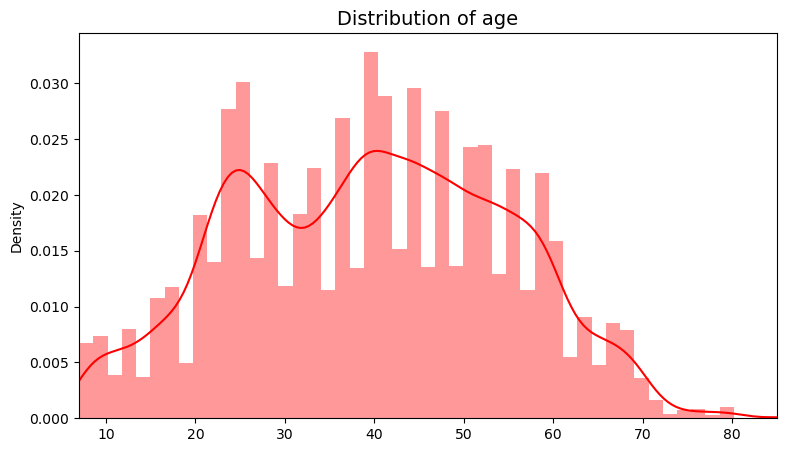

<Figure size 1200x800 with 0 Axes>

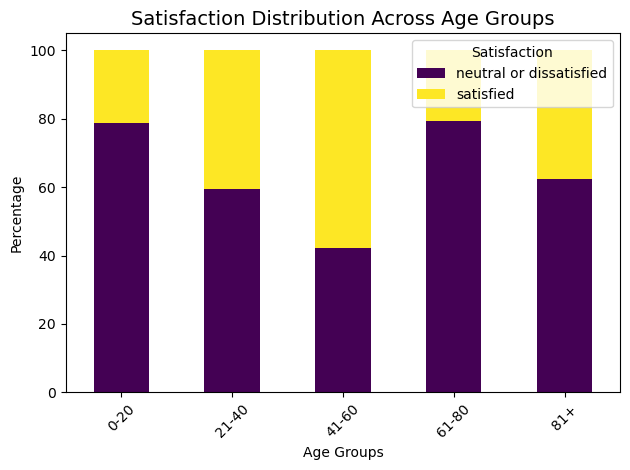

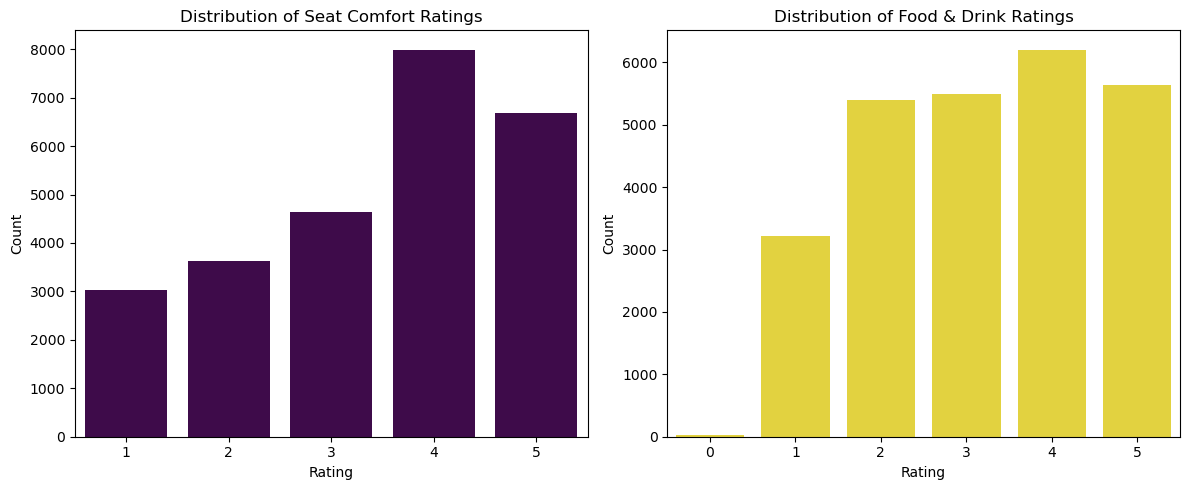

14


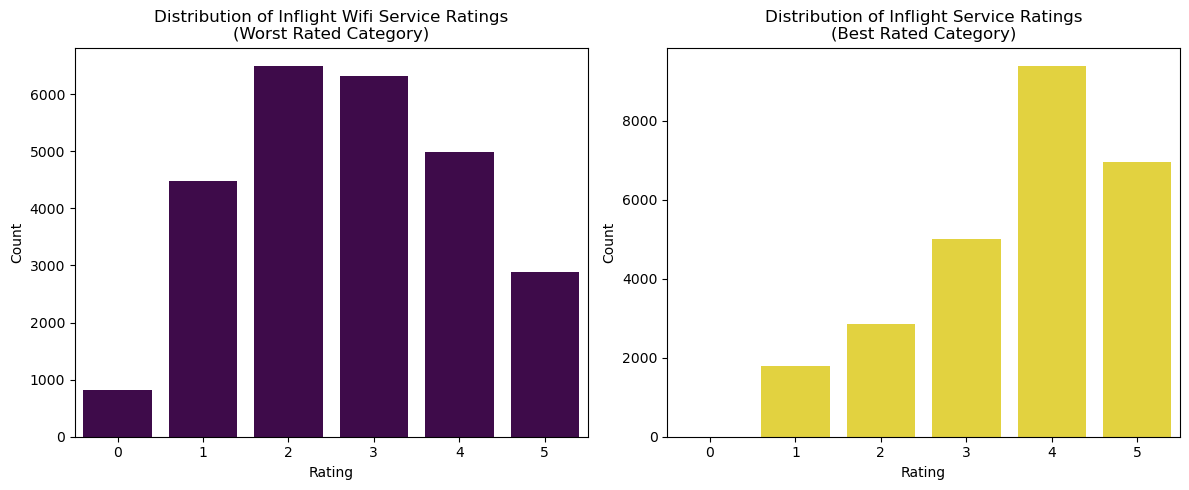

In [ ]:
plot_distributions(df, ['age'])

# Create age groups for more detailed analysis
df['age_group'] = pd.cut(df['age'], bins=[0,20,40,60,80,100], labels=['0-20','21-40','41-60','61-80','81+'])

# Plot satisfaction distribution across age groups
plt.figure(figsize=(12,8))
satisfaction_by_age_group = pd.crosstab(df['age_group'], df['satisfaction'], normalize='index') * 100

satisfaction_by_age_group.plot(kind='bar', stacked=True, color=colors)
plt.title('Satisfaction Distribution Across Age Groups', fontsize=14)
plt.xlabel('Age Groups')
plt.ylabel('Percentage')
plt.legend(title='Satisfaction')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Drop age_group column
df = df.drop('age_group', axis=1)


# Plot distribution of ratings for seat comfort and food/drink
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.countplot(data=df, x='seat_comfort', color=colors[0])
plt.title('Distribution of Seat Comfort Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.subplot(1,2,2) 
sns.countplot(data=df, x='food_and_drink', color=colors[1])
plt.title('Distribution of Food & Drink Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Create a pass of size for categorical columns
all_categorical_columns = [col for col in df.columns if df[col].dtype == 'category']
exclude_columns = ['gender', 'type_of_travel', 'customer_type', 'class', 'age', 'flight_distance', 'arrival_delay_in_minutes', 'departure_delay_in_minutes', 'satisfaction']
service_columns = [col for col in all_categorical_columns if col not in exclude_columns]


# Calculate mean rating for each service category
df_numeric = df[service_columns].dropna().astype('int')
service_means = df_numeric.mean().sort_values()
print(len(service_means))
# Get worst and best rated categories
worst_category = service_means.index[0]
best_category = service_means.index[-1]

# Plot distributions
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.countplot(data=df, x=worst_category, color=colors[0])
plt.title(f'Distribution of {worst_category.replace("_"," ").title()} Ratings\n(Worst Rated Category)')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.countplot(data=df, x=best_category, color=colors[1]) 
plt.title(f'Distribution of {best_category.replace("_"," ").title()} Ratings\n(Best Rated Category)')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.tight_layout()
plt.show()




/var/folders/b_/6hg48zw14yz957yrgs4mg_xc0000gn/T/ipykernel_85068/781441867.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



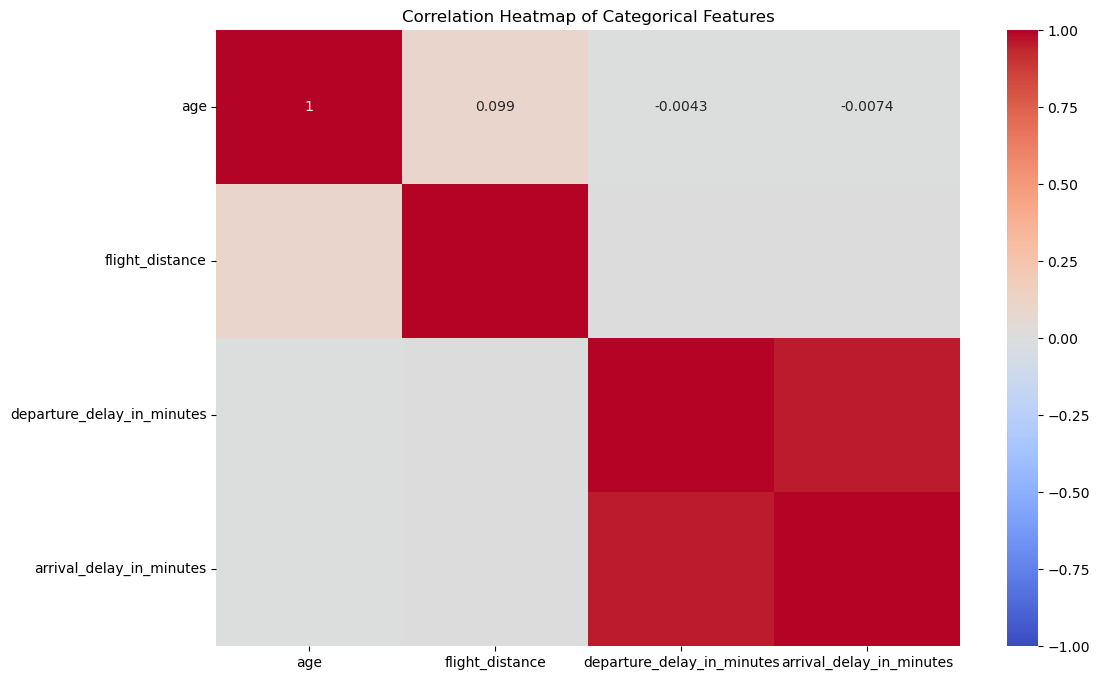

In [ ]:
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Categorical Features')
plt.show()



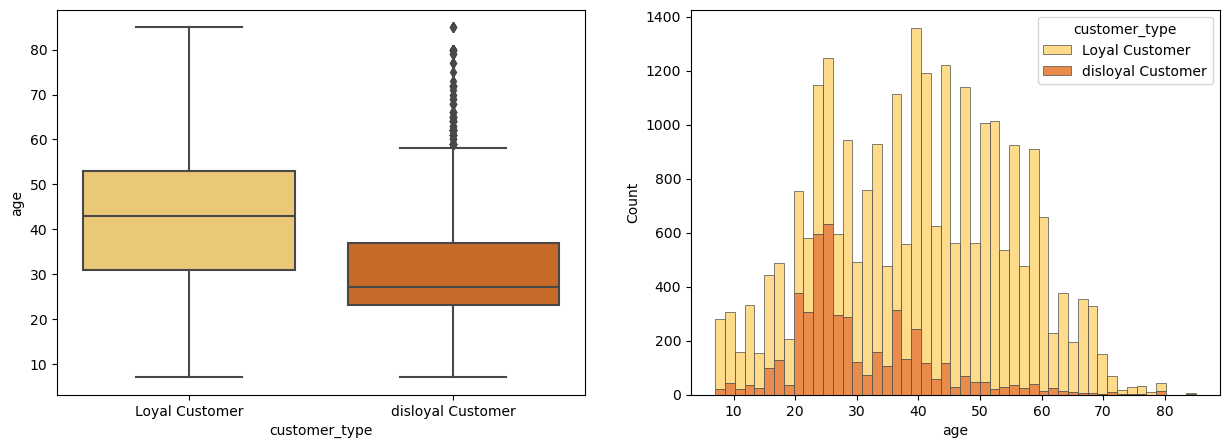

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "customer_type", y = "age", palette = "YlOrBr", data = df, ax = ax[0])
sns.histplot(df, x = "age", hue = "customer_type", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

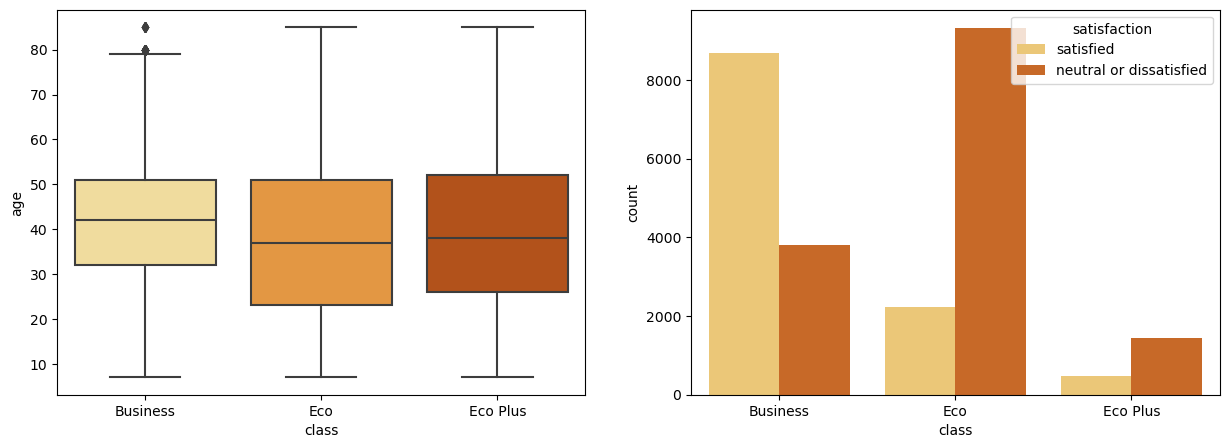

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "class", y = "age", palette="YlOrBr", data = df, ax = ax[0])
sns.countplot(x = "class", hue = "satisfaction", palette = "YlOrBr", data=df)
pass



In [ ]:

from sklearn.preprocessing import LabelEncoder

df = df.dropna(subset=[TARGET_CLASS_NAME])
        # Handle missing values in features
for col in df.columns:
    if col != TARGET_CLASS_NAME:
        if df[col].dtype in ['object', 'category']:
            # Fill categorical missing values with mode
            df[col] = df[col].fillna(df[col].mode()[0] if not df[col].mode().empty else 'unknown')
        else:
            # Fill numerical missing values with median
            df[col] = df[col].fillna(df[col].median())

# Encode categorical variables
label_encoders = {}
for col in df.columns:
    if df[col].dtype in ['object', 'category']:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le


In [ ]:
df.shape

(25976, 23)

### Save processed dataset to CSV

In [ ]:
# Save train or test datasets
df.to_csv('data/processed/binary_balanced_airflight_satisfaction/' + CURR_FILE_NAME, index=False)

print("Dataset set shape: ", df.shape)
print("Dataset saved to: ", 'data/processed/binary_balanced_airflight_satisfaction/' + CURR_FILE_NAME)

Dataset set shape:  (25976, 23)
Dataset saved to:  data/processed/binary_balanced_airflight_satisfaction/test.csv


# Credit Card Fraud Dataset 
Mocno niezbalansowany zbi√≥r danych klasyfikacji binarnej do wykrywania oszuka≈Ñczych transakcji kartami kredytowymi. Cechy to warto≈õci numeryczne po transformacji PCA ze wzglƒôdu na prywatno≈õƒá. Zmienna docelowa wskazuje, czy transakcja jest oszuka≈Ñcza czy legalna.

### Zbiory danych treningowych

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython.display import display
from collections import Counter
from matplotlib.colors import rgb2hex
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
# To create interactive plots
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import seaborn as sns


TRAIN_FILE_NAME = "train.csv"
TEST_FILE_NAME = "test.csv"
TARGET_CLASS_NAME = "class"

colors = ["#0101DF", "#DF0101"]

In [ ]:

def load_data(path):
  if path is None or path == "":
    raise ValueError("Dataset path is invalid")
  elif not os.path.exists(path):
    raise FileNotFoundError(f"Dataset not found at path: {path}")

  train_path = os.path.join(path, TRAIN_FILE_NAME)

  df = pd.read_csv(train_path)
  return df.sample(frac=0.8, random_state=42) # file size must not exceed 100MB in GitHub

In [ ]:
def analyze_data(df, class_column_key):
  #display shape
  display(df.shape)
  #display sum of cells having null value and column name
  null_counts = df.isnull().sum()
  max_nulls = null_counts.max()
  max_null_col = null_counts[null_counts == max_nulls].index[0] if max_nulls > 0 else "No nulls"
  display(f"Maximum null values: {max_nulls} in column: {max_null_col}")
  # Get null values and dataframe information
  print('Null Values In DataFrame: {}\n'.format(df.isna().sum().sum()))
  display(df.info())

  label_col = df[class_column_key]

  # Plotting data
  label_counts = label_col.value_counts()

  # Get colors
  n = label_counts.shape[0]
  colormap = get_cmap('viridis')
  colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

  plt.figure(figsize=(10, 6)) # Create a new figure and set its size
  plt.bar(label_counts.index, label_counts.values, color=colors) # Create a bar plot
  plt.title('Class counts') # Set the title of the plot
  plt.xlabel('Class names') # Set the label for the x-axis
  plt.ylabel('Count') # Set the label for the y-axis
  plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
  plt.tight_layout() # Adjust layout to prevent labels from overlapping
  plt.show() # Display the plot

  display(df.describe(include='all'))

### Unbalanced credit card frauds

In [ ]:
df = load_data("data/raw/binary_unbalanced_credit_card_fraud")
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df.head()

Time         V1        V2         V3        V4         V5  \
43428    41505.0 -16.526507  8.584972 -18.649853  9.505594 -13.793819   
49906    44261.0   0.339812 -2.743745  -0.134070 -1.385729  -1.451413   
29474    35484.0   1.399590 -0.590701   0.168619 -1.029950  -0.539806   
276481  167123.0  -0.432071  1.647895  -1.669361 -0.349504   0.785785   
278846  168473.0   2.014160 -0.137394  -1.015839  0.327269  -0.182179   

              V6         V7        V8        V9  ...       V21       V22  \
43428  -2.832404 -16.701694  7.517344 -8.507059  ...  1.190739 -1.127670   
49906   1.015887  -0.524379  0.224060  0.899746  ... -0.213436 -0.942525   
29474   0.040444  -0.712567  0.002299 -0.971747  ...  0.102398  0.168269   
276481 -0.630647   0.276990  0.586025 -0.484715  ...  0.358932  0.873663   
278846 -0.956571   0.043241 -0.160746  0.363241  ... -0.238644 -0.616400   

             V23       V24       V25       V26       V27       V28  Amount  \
43428  -2.358579  0.673461 -1.413700 -0.462762 -2.018575 -1.042804  364.19   
49906  -0.526819 -1.156992  0.311211 -0.746647  0.040996  0.102038  520.12   
29474  -0.166639 -0.810250  0.505083 -0.232340  0.011409  0.004634   31.00   
276481 -0.178642 -0.017171 -0.207392 -0.157756 -0.237386  0.001934    1.50   
278846  0.347045  0.061561 -0.360196  0.174730 -0.078043 -0.070571    0.89   

        Class  
43428       1  
49906       0  
29474       0  
276481      0  
278846      0  

[5 rows x 31 columns]

In [ ]:
#rename columns to lower case
df.columns = df.columns.str.lower()
df.head()

time         v1        v2         v3        v4         v5  \
43428    41505.0 -16.526507  8.584972 -18.649853  9.505594 -13.793819   
49906    44261.0   0.339812 -2.743745  -0.134070 -1.385729  -1.451413   
29474    35484.0   1.399590 -0.590701   0.168619 -1.029950  -0.539806   
276481  167123.0  -0.432071  1.647895  -1.669361 -0.349504   0.785785   
278846  168473.0   2.014160 -0.137394  -1.015839  0.327269  -0.182179   

              v6         v7        v8        v9  ...       v21       v22  \
43428  -2.832404 -16.701694  7.517344 -8.507059  ...  1.190739 -1.127670   
49906   1.015887  -0.524379  0.224060  0.899746  ... -0.213436 -0.942525   
29474   0.040444  -0.712567  0.002299 -0.971747  ...  0.102398  0.168269   
276481 -0.630647   0.276990  0.586025 -0.484715  ...  0.358932  0.873663   
278846 -0.956571   0.043241 -0.160746  0.363241  ... -0.238644 -0.616400   

             v23       v24       v25       v26       v27       v28  amount  \
43428  -2.358579  0.673461 -1.413700 -0.462762 -2.018575 -1.042804  364.19   
49906  -0.526819 -1.156992  0.311211 -0.746647  0.040996  0.102038  520.12   
29474  -0.166639 -0.810250  0.505083 -0.232340  0.011409  0.004634   31.00   
276481 -0.178642 -0.017171 -0.207392 -0.157756 -0.237386  0.001934    1.50   
278846  0.347045  0.061561 -0.360196  0.174730 -0.078043 -0.070571    0.89   

        class  
43428       1  
49906       0  
29474       0  
276481      0  
278846      0  

[5 rows x 31 columns]

In [ ]:
print('No Frauds', round(df['class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
num_of_frauds = df['class'].value_counts()[1]
print('Frauds', round(num_of_frauds/len(df) * 100,2), '% of the dataset')
print('Number of fraud transactions', num_of_frauds)

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Number of fraud transactions 387


### Analyze columns and nulls


(227846, 31)

'Maximum null values: 0 in column: No nulls'

Null Values In DataFrame: 0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227846 entries, 43428 to 213180
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    227846 non-null  float64
 1   v1      227846 non-null  float64
 2   v2      227846 non-null  float64
 3   v3      227846 non-null  float64
 4   v4      227846 non-null  float64
 5   v5      227846 non-null  float64
 6   v6      227846 non-null  float64
 7   v7      227846 non-null  float64
 8   v8      227846 non-null  float64
 9   v9      227846 non-null  float64
 10  v10     227846 non-null  float64
 11  v11     227846 non-null  float64
 12  v12     227846 non-null  float64
 13  v13     227846 non-null  float64
 14  v14     227846 non-null  float64
 15  v15     227846 non-null  float64
 16  v16     227846 non-null  float64
 17  v17     227846 non-null  float64
 18  v18     227846 non-null  float64
 19  v19     227846 non-null  float64
 20  v20     227846 

None

/var/folders/b_/6hg48zw14yz957yrgs4mg_xc0000gn/T/ipykernel_76797/2670232780.py:20: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



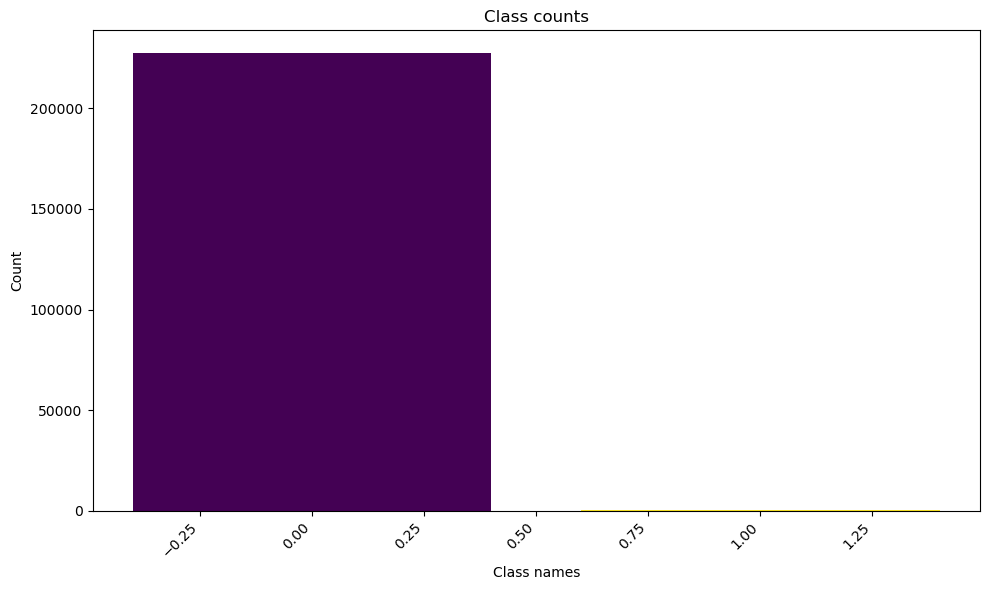

time             v1             v2             v3  \
count  227846.000000  227846.000000  227846.000000  227846.000000   
mean    94878.135403       0.003417       0.002014       0.000485   
std     47487.612836       1.951477       1.632831       1.511987   
min         0.000000     -46.855047     -60.464618     -33.680984   
25%     54224.000000      -0.918903      -0.596600      -0.890425   
50%     84793.500000       0.021103       0.065595       0.180289   
75%    139366.000000       1.316328       0.803540       1.027265   
max    172792.000000       2.451888      21.467203       9.382558   

                  v4             v5             v6             v7  \
count  227846.000000  227846.000000  227846.000000  227846.000000   
mean        0.000079       0.000091      -0.001396      -0.000349   
std         1.414350       1.360711       1.323366       1.217531   
min        -5.683171     -42.147898     -23.496714     -41.506796   
25%        -0.848205      -0.691445      -0.770017      -0.553157   
50%        -0.018959      -0.053240      -0.275132       0.040044   
75%         0.744322       0.612325       0.398199       0.569602   
max        16.875344      34.099309      23.917837      44.054461   

                  v8             v9  ...            v21            v22  \
count  227846.000000  227846.000000  ...  227846.000000  227846.000000   
mean       -0.000033      -0.001121  ...       0.000524      -0.000953   
std         1.198509       1.098270  ...       0.738604       0.725281   
min       -73.216718     -13.434066  ...     -34.830382      -9.499423   
25%        -0.208821      -0.643276  ...      -0.228295      -0.543157   
50%         0.022233      -0.051956  ...      -0.029798       0.006449   
75%         0.326577       0.594780  ...       0.186244       0.527882   
max        20.007208      15.594995  ...      27.202839      10.503090   

                 v23            v24            v25            v26  \
count  227846.000000  227846.000000  227846.000000  227846.000000   
mean       -0.000134      -0.000457       0.000899      -0.000080   
std         0.626764       0.605221       0.520714       0.481668   
min       -44.807735      -2.836627     -10.295397      -2.604551   
25%        -0.161937      -0.354525      -0.316886      -0.326533   
50%        -0.011093       0.040527       0.018175      -0.052024   
75%         0.147648       0.438460       0.351476       0.239792   
max        22.083545       4.022866       7.519589       3.517346   

                 v27            v28         amount          class  
count  227846.000000  227846.000000  227846.000000  227846.000000  
mean        0.000026       0.000055      87.890337       0.001699  
std         0.398954       0.324199     238.806140       0.041178  
min       -22.565679     -11.710896       0.000000       0.000000  
25%        -0.070766      -0.052799       5.520000       0.000000  
50%         0.001296       0.011200      22.000000       0.000000  
75%         0.090715       0.078090      77.097500       0.000000  
max        12.152401      22.620072   18910.000000       1.000000  

[8 rows x 31 columns]

In [ ]:
analyze_data(df, 'class')

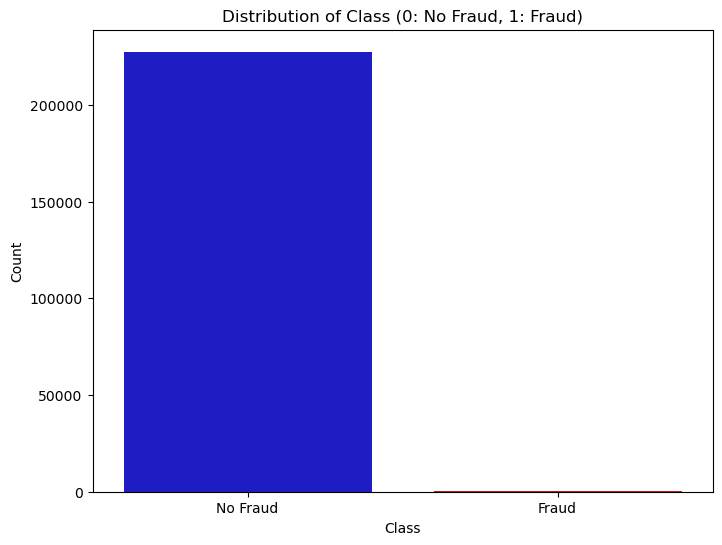

In [ ]:
# Visualize the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df, palette=colors)
plt.title('Distribution of Class (0: No Fraud, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Fraud', 'Fraud']) # Explicitly label the x-ticks
plt.show()

In [ ]:
def plot_distributions(df, class_names):
  for class_name in class_names:
    df_frist_class = df[class_name]
    fig1, ax1 = plt.subplots(figsize=(9, 5))
    sns.distplot(df_frist_class.values, ax=ax1, color='r')
    ax1.set_title('Distribution of ' + class_name, fontsize=14)
    ax1.set_xlim([df_frist_class.min(), df_frist_class.max()])
    plt.show()

/var/folders/b_/6hg48zw14yz957yrgs4mg_xc0000gn/T/ipykernel_76797/881755835.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




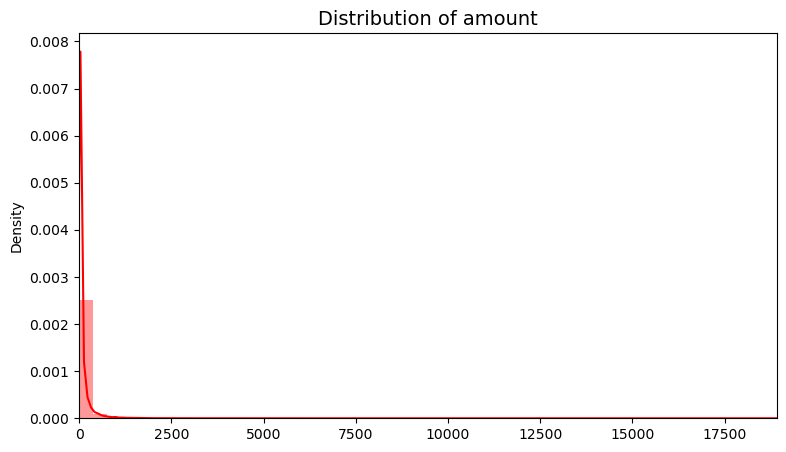

/var/folders/b_/6hg48zw14yz957yrgs4mg_xc0000gn/T/ipykernel_76797/881755835.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




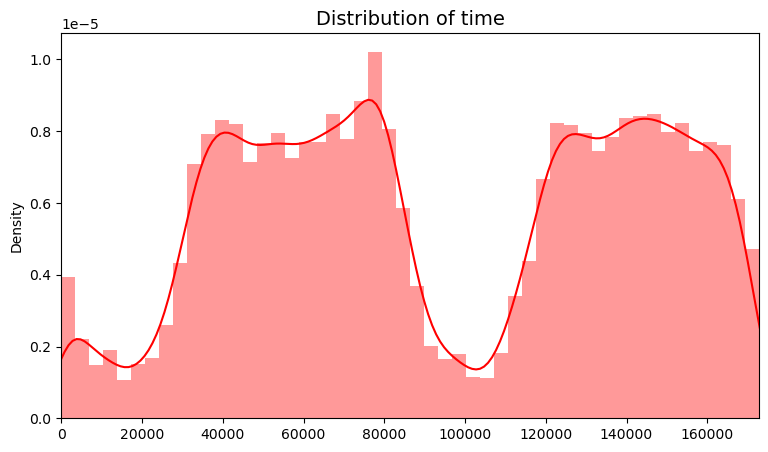

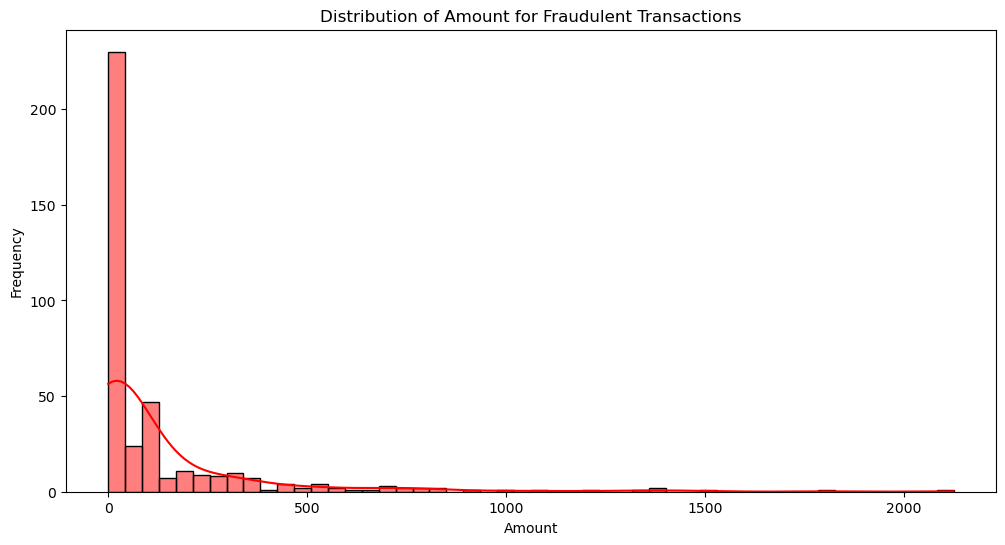

In [ ]:
plot_distributions(df, ['amount', 'time'])

# Plot distribution of Amount for fraudulent transactions only
df_third_class = df['class']
plt.figure(figsize=(12, 6))
sns.histplot(data=df[df['class'] == 1], x='amount', bins=50, kde=True, color='red', stat='count')
plt.title('Distribution of Amount for Fraudulent Transactions')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['time'].values.reshape(-1,1))

df.drop(['time','amount'], axis=1, inplace=True)

scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

scaled_amount  scaled_time         v1        v2         v3        v4  \
43428        4.780692    -0.508427 -16.526507  8.584972 -18.649853  9.505594   
49906        6.959170    -0.476058   0.339812 -2.743745  -0.134070 -1.385729   
29474        0.125738    -0.579144   1.399590 -0.590701   0.168619 -1.029950   
276481      -0.286403     0.966967  -0.432071  1.647895  -1.669361 -0.349504   
278846      -0.294925     0.982823   2.014160 -0.137394  -1.015839  0.327269   

               v5        v6         v7        v8  ...       v20       v21  \
43428  -13.793819 -2.832404 -16.701694  7.517344  ... -1.514923  1.190739   
49906   -1.451413  1.015887  -0.524379  0.224060  ...  0.506044 -0.213436   
29474   -0.539806  0.040444  -0.712567  0.002299  ...  0.212877  0.102398   
276481   0.785785 -0.630647   0.276990  0.586025  ... -0.244633  0.358932   
278846  -0.182179 -0.956571   0.043241 -0.160746  ... -0.255293 -0.238644   

             v22       v23       v24       v25       v26       v27       v28  \
43428  -1.127670 -2.358579  0.673461 -1.413700 -0.462762 -2.018575 -1.042804   
49906  -0.942525 -0.526819 -1.156992  0.311211 -0.746647  0.040996  0.102038   
29474   0.168269 -0.166639 -0.810250  0.505083 -0.232340  0.011409  0.004634   
276481  0.873663 -0.178642 -0.017171 -0.207392 -0.157756 -0.237386  0.001934   
278846 -0.616400  0.347045  0.061561 -0.360196  0.174730 -0.078043 -0.070571   

        class  
43428       1  
49906       0  
29474       0  
276481      0  
278846      0  

[5 rows x 31 columns]

Distribution of the classes in the subsampled dataset:
1    0.5
0    0.5
Name: class, dtype: float64


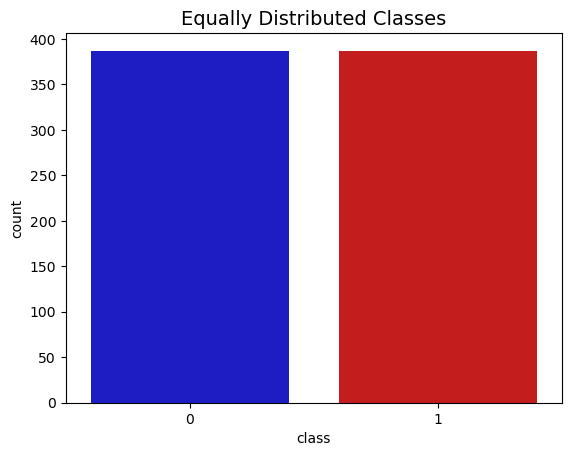

In [ ]:
df = df.sample(frac=1)

fraud_df = df.loc[df['class'] == 1]
non_fraud_df = df.loc[df['class'] == 0][:num_of_frauds]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

new_shuffled_df = normal_distributed_df.sample(frac=1, random_state=42)

new_shuffled_df.head()

print('Distribution of the classes in the subsampled dataset:')
print(new_shuffled_df['class'].value_counts() / len(new_shuffled_df))

sns.countplot(x='class', data=new_shuffled_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [ ]:
df.head()

scaled_amount  scaled_time        v1        v2        v3        v4  \
113368      -0.257343    -0.138046 -0.612282  1.132224  1.234392 -0.192202   
59421       -0.293388    -0.422394  1.257913  0.597510 -0.578114  0.992278   
238739      -0.097796     0.763495  0.214233  0.204280  0.588482 -1.919046   
70501       -0.255807    -0.362917 -0.975258  0.354607  1.367837 -1.567547   
111181      -0.307219    -0.148734  1.083204 -0.311229  1.143350  0.495362   

              v5        v6        v7        v8  ...       v20       v21  \
113368  0.060297 -0.658193  0.617158  0.024300  ...  0.180147 -0.302543   
59421   0.510822 -0.376638  0.178060 -0.043906  ... -0.064133 -0.056782   
238739  0.486972 -0.928910  1.133106 -0.810855  ...  0.213672  0.026536   
70501   0.641021  0.011974  0.492806  0.003845  ... -0.067720 -0.096809   
111181 -0.697320  0.833307 -0.930673  0.490311  ... -0.185637  0.190798   

             v22       v23       v24       v25       v26       v27       v28  \
113368 -0.779244 -0.068306 -0.160487 -0.106357  0.109851  0.369267  0.172247   
59421  -0.122684 -0.239118 -0.642818  0.778060 -0.291457  0.027178  0.032374   
238739  0.382433 -0.128077  1.186252 -0.101475 -0.444499 -0.427111 -0.410155   
70501  -0.032785  0.058324 -0.635358 -0.516740  0.705444 -0.096091 -0.073831   
111181  0.742300  0.007084 -0.237682  0.138390  0.617154  0.033197  0.004315   

        class  
113368      0  
59421       0  
238739      0  
70501       0  
111181      0  

[5 rows x 31 columns]

### Split and save processed dataset to file

In [ ]:
from sklearn.model_selection import train_test_split

# Split into train and test sets (80-20 split)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Save train and test datasets
train_df.to_csv('data/processed/binary_unbalanced_credit_card_fraud/' + TRAIN_FILE_NAME, index=False)
test_df.to_csv('data/processed/binary_unbalanced_credit_card_fraud/' + TEST_FILE_NAME, index=False)

print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)


Training set shape: (182276, 31)
Testing set shape: (45570, 31)


# Human Activity Recognition Dataset
 Zbi√≥r danych klasyfikacji wieloklasowej zawierajƒÖcy dane z czujnik√≥w smartfona (akcelerometr i ≈ºyroskop) od 30 os√≥b wykonujƒÖcych 6 r√≥≈ºnych czynno≈õci (chodzenie, wchodzenie po schodach, schodzenie po schodach, siedzenie, stanie, le≈ºenie). Cechy sƒÖ wyprowadzone z surowych sygna≈Ç√≥w z czujnik√≥w.

### Zbiory danych treningowych

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython.display import display
from collections import Counter
from matplotlib.colors import rgb2hex
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
# To create interactive plots
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import seaborn as sns


CURR_FILE_NAME = "test.csv" # or test.csv
TARGET_CLASS_NAME = "Activity"

colors = ["#0101DF", "#DF0101"]

In [ ]:

def load_data(path):
  if path is None or path == "":
    raise ValueError("Dataset path is invalid")
  elif not os.path.exists(path):
    raise FileNotFoundError(f"Dataset not found at path: {path}")

  train_path = os.path.join(path, CURR_FILE_NAME)

  return pd.read_csv(train_path)

In [ ]:
def analyze_data(df, class_column_key):
  #display shape
  display(df.shape)
  #display sum of cells having null value and column name
  null_counts = df.isnull().sum()
  max_nulls = null_counts.max()
  max_null_col = null_counts[null_counts == max_nulls].index[0] if max_nulls > 0 else "No nulls"
  display(f"Maximum null values: {max_nulls} in column: {max_null_col}")
  # Get null values and dataframe information
  print('Null Values In DataFrame: {}\n'.format(df.isna().sum().sum()))
  display(df.info())

  label_col = df[class_column_key]

  # Plotting data
  label_counts = label_col.value_counts()

  # Get colors
  n = label_counts.shape[0]
  colormap = get_cmap('viridis')
  colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

  plt.figure(figsize=(10, 6)) # Create a new figure and set its size
  plt.bar(label_counts.index, label_counts.values, color=colors) # Create a bar plot
  plt.title('Class counts') # Set the title of the plot
  plt.xlabel('Class names') # Set the label for the x-axis
  plt.ylabel('Count') # Set the label for the y-axis
  plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
  plt.tight_layout() # Adjust layout to prevent labels from overlapping
  plt.show() # Display the plot

  display(df.describe(include='all'))

In [ ]:
def plot_distributions(df, class_names):
  for class_name in class_names:
    df_frist_class = df[class_name]
    fig1, ax1 = plt.subplots(figsize=(9, 5))
    sns.distplot(df_frist_class.values, ax=ax1, color='r')
    ax1.set_title('Distribution of ' + class_name, fontsize=14)
    ax1.set_xlim([df_frist_class.min(), df_frist_class.max()])
    plt.show()

In [ ]:
df = load_data("data/raw/multi_class_balanced_human_activity_recognition")
df.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

(2947, 563)

'Maximum null values: 0 in column: No nulls'

Null Values In DataFrame: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB


None

/var/folders/b_/6hg48zw14yz957yrgs4mg_xc0000gn/T/ipykernel_93658/2670232780.py:20: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



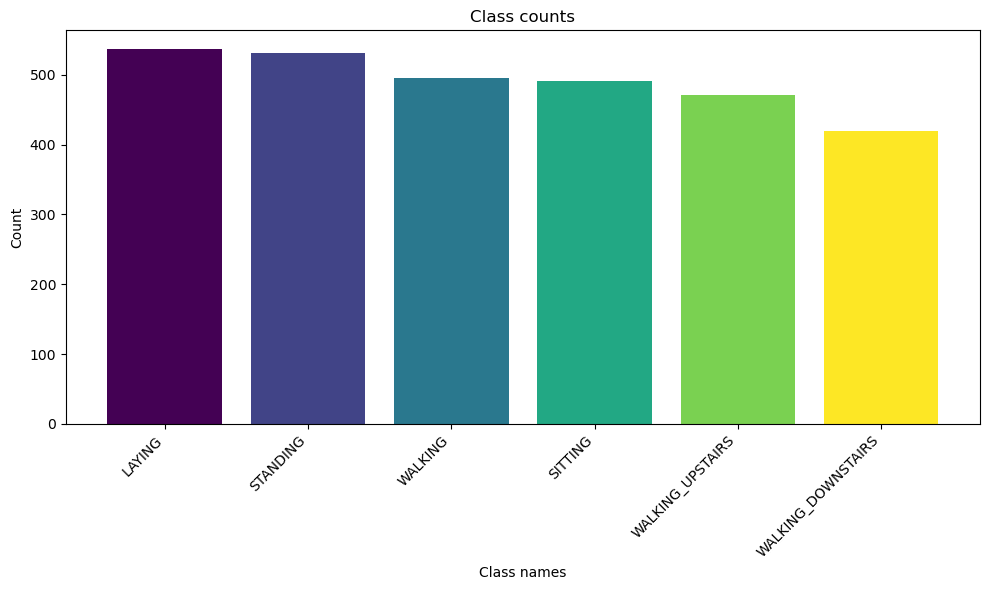

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count         2947.000000        2947.000000        2947.000000   
unique                NaN                NaN                NaN   
top                   NaN                NaN                NaN   
freq                  NaN                NaN                NaN   
mean             0.273996          -0.017863          -0.108386   
std              0.060570           0.025745           0.042747   
min             -0.592004          -0.362884          -0.576184   
25%              0.262075          -0.024961          -0.121162   
50%              0.277113          -0.016967          -0.108458   
75%              0.288097          -0.010143          -0.097123   
max              0.671887           0.246106           0.494114   

        tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  \
count        2947.000000       2947.000000       2947.000000   
unique               NaN               NaN               NaN   
top                  NaN               NaN               NaN   
freq                 NaN               NaN               NaN   
mean           -0.613635         -0.508330         -0.633797   
std             0.412597          0.494269          0.362699   
min            -0.999606         -1.000000         -0.998955   
25%            -0.990914         -0.973664         -0.976122   
50%            -0.931214         -0.790972         -0.827534   
75%            -0.267395         -0.105919         -0.311432   
max             0.465299          1.000000          0.489703   

        tBodyAcc-mad()-X  tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  \
count        2947.000000       2947.000000       2947.000000   
unique               NaN               NaN               NaN   
top                  NaN               NaN               NaN   
freq                 NaN               NaN               NaN   
mean           -0.641278         -0.522676         -0.637038   
std             0.385199          0.479899          0.357753   
min            -0.999417         -0.999914         -0.998899   
25%            -0.992333         -0.974131         -0.975352   
50%            -0.937664         -0.799907         -0.817005   
75%            -0.321719         -0.133488         -0.322771   
max             0.439657          1.000000          0.427958   

        tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-kurtosis()  \
count        2947.000000  ...                      2947.000000   
unique               NaN  ...                              NaN   
top                  NaN  ...                              NaN   
freq                 NaN  ...                              NaN   
mean           -0.462063  ...                        -0.598756   
std             0.523916  ...                         0.311042   
min            -0.952357  ...                        -1.000000   
25%            -0.934447  ...                        -0.829593   
50%            -0.852659  ...                        -0.683672   
75%            -0.009965  ...                        -0.458332   
max             0.786436  ...                         1.000000   

        angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
count                   2947.000000                           2947.000000   
unique                          NaN                                   NaN   
top                             NaN                                   NaN   
freq                            NaN                                   NaN   
mean                       0.005264                              0.003799   
std                        0.336147                              0.445077   
min                       -1.000000                             -0.993402   
25%                       -0.130541                             -0.282600   
50%                        0.005188                              0.006767   
75%                        0.146200                              0.288113   
max                      

In [ ]:
analyze_data(df, "Activity")

In [ ]:
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in df.columns]), orient='index').rename(columns={0:'count'}).sort_values('count', ascending=False)

count
fBodyAcc                 79
fBodyGyro                79
fBodyAccJerk             79
tGravityAcc              40
tBodyAcc                 40
tBodyGyroJerk            40
tBodyGyro                40
tBodyAccJerk             40
tBodyAccMag              13
tGravityAccMag           13
tBodyAccJerkMag          13
tBodyGyroMag             13
tBodyGyroJerkMag         13
fBodyAccMag              13
fBodyBodyAccJerkMag      13
fBodyBodyGyroMag         13
fBodyBodyGyroJerkMag     13
angle                     7
subject                   1
Activity                  1

In [ ]:
from sklearn.preprocessing import LabelEncoder

df = df.dropna(subset=[TARGET_CLASS_NAME])
        # Handle missing values in features
for col in df.columns:
    if col != TARGET_CLASS_NAME:
        if df[col].dtype in ['object', 'category']:
            # Fill categorical missing values with mode
            df[col] = df[col].fillna(df[col].mode()[0] if not df[col].mode().empty else 'unknown')
        else:
            # Fill numerical missing values with median
            df[col] = df[col].fillna(df[col].median())

# Encode categorical variables
label_encoders = {}
for col in df.columns:
    if df[col].dtype in ['object', 'category']:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

In [ ]:
df.head(10)

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.257178          -0.023285          -0.014654         -0.938404   
1           0.286027          -0.013163          -0.119083         -0.975415   
2           0.275485          -0.026050          -0.118152         -0.993819   
3           0.270298          -0.032614          -0.117520         -0.994743   
4           0.274833          -0.027848          -0.129527         -0.993852   
5           0.279220          -0.018620          -0.113902         -0.994455   
6           0.279746          -0.018271          -0.104000         -0.995819   
7           0.274601          -0.025035          -0.116831         -0.995594   
8           0.272529          -0.020954          -0.114472         -0.996784   
9           0.275746          -0.010372          -0.099776         -0.998373   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.920091         -0.667683         -0.952501         -0.925249   
1         -0.967458         -0.944958         -0.986799         -0.968401   
2         -0.969926         -0.962748         -0.994403         -0.970735   
3         -0.973268         -0.967091         -0.995274         -0.974471   
4         -0.967445         -0.978295         -0.994111         -0.965953   
5         -0.970417         -0.965316         -0.994585         -0.969481   
6         -0.976354         -0.977725         -0.995996         -0.973665   
7         -0.982069         -0.985262         -0.995341         -0.981485   
8         -0.975906         -0.986597         -0.997029         -0.973735   
9         -0.986933         -0.991022         -0.998663         -0.987140   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-kurtosis()  \
0         -0.674302         -0.894088  ...                        -0.705974   
1         -0.945823         -0.894088  ...                        -0.594944   
2         -0.963483         -0.939260  ...                        -0.640736   
3         -0.968897         -0.938610  ...                        -0.736124   
4         -0.977346         -0.938610  ...                        -0.846595   
5         -0.965897         -0.937856  ...                        -0.857565   
6         -0.979253         -0.937856  ...                        -0.391286   
7         -0.984610         -0.941263  ...                        -0.672358   
8         -0.985556         -0.941263  ...                        -0.853248   
9         -0.991084         -0.943761  ...                        -0.741435   

   angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
0                     0.006462                              0.162920   
1                    -0.083495                              0.017500   
2                    -0.034956                              0.202302   
3                    -0.017067                              0.154438   
4                    -0.002223                             -0.040046   
5                    -0.095681                              0.048849   
6                    -0.309083                             -0.000857   
7                    -0.025526                             -0.214033   
8                     0.144626                             -0.035564   
9                     0.157584                             -0.033487   

   angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
0                         -0.825886                              0.271151   
1                         -0.434375                              0.920593   
2                          0.064103                              0.145068   
3                          0.340134                              0.296407   
4                          0.736715                             -0.118545   
5                          0.760684                             -0.072216   
6                          0.728514                             -0.33377

### Save processed dataset to CSV

In [ ]:

# Save train or test datasets
df.to_csv('data/processed/multi_class_balanced_human_activity_recognition/' + CURR_FILE_NAME, index=False)

print("Training set shape:", df.shape)
print("Dataset saved to: ", 'data/processed/multi_class_balanced_human_activity_recognition/' + CURR_FILE_NAME)

Training set shape: (2947, 563)
Dataset saved to:  data/processed/multi_class_balanced_human_activity_recognition/test.csv


## OPISAƒÜ TUTAJ NASZƒÖ implementacjƒô ensmble runnera #TODO

### Implementacja `EnsembleRunner` i `BaselineRunner`

W ramach naszego projektu zaimplementowali≈õmy dwie g≈Ç√≥wne klasy do przeprowadzania eksperyment√≥w: `EnsembleRunner` oraz `BaselineRunner`. `EnsembleRunner` s≈Çu≈ºy do trenowania i testowania modeli zespo≈Çowych, takich jak Bagging i Lasy Losowe (Random Forest), podczas gdy `BaselineRunner` pozwala na uruchamianie pojedynczych modeli bazowych (np. Drzewo Decyzyjne) w celu por√≥wnania wynik√≥w.

Sterowanie eksperymentami odbywa siƒô za pomocƒÖ centralnego obiektu konfiguracyjnego. Definiuje on wszystkie kluczowe aspekty, w tym:
- Nazwƒô eksperymentu
- ≈öcie≈ºki do danych
- Konfiguracjƒô modelu
- Opcjonalne ustawienia dotyczƒÖce podzbioru danych oraz hiperparametr√≥w.

KluczowƒÖ cechƒÖ naszego rozwiƒÖzania jest elastyczno≈õƒá. Konfiguracje `dataset_config` (odpowiedzialna za wyb√≥r atrybut√≥w) oraz `hyperparameters_config` (odpowiedzialna za definicjƒô przestrzeni hiperparametr√≥w) sƒÖ opcjonalne.
- Je≈õli `dataset_config` nie zostanie podany, model zostanie wytrenowany na wszystkich kolumnach dostƒôpnych w zbiorze danych.
- Je≈õli `hyperparameters_config` zostanie pominiƒôty, wykorzystane zostanƒÖ domy≈õlne warto≈õci hiperparametr√≥w dla danego modelu.


## Przyk≈Çadowa konfiguracja eksperyment√≥w


In [12]:
import sys
sys.path.append("../") # go to parent dir
from src.utils.generate_hyperparams import HyperparamsGenerator
from src.utils.generate_data_subset import DataSubsetGenerator
from src.models.decision_tree_model import DecisionTreeModel
from src.utils.common import FLIGHTS_DATASET_TARGET_CLASS_NAME

dataset_conf = {
    'dataset_name': 'data/processed/binary_balanced_airflight_satisfaction/train.csv',
    'dataset_shortname': 'flights',
    'shrunk_size': None,
    'n_attributes_max': 10,
    'n_attributes_min': 10,
    'select_type': 'standard-selection', # or 'sqrt-selection'
    'target_column': FLIGHTS_DATASET_TARGET_CLASS_NAME
}


model_conf = {
    'model_type': DecisionTreeModel,
    'max_depth': {
        'type': 'int',
        'min': 10,
        'max': 20
    },
    'min_samples_split': {
        'type': 'int',
        'min': 2,
        'max': 30
    },
    'min_samples_leaf': {
        'type': 'int',
        'min': 1,
        'max': 30
    },
    'max_features': {
        'type': 'list',
        'options': ['sqrt', 'log2', None]
    },
    'criterion': {
        'type': 'list',
        'options': ['gini', 'entropy']
    },
    'splitter': {
        'type': 'list',
        'options': ['best', 'random']
    }        
}


ensemble_config = {
    'run_id': 0,
    'model_name': 'DecisionTree',
    'seed': 0,
    'n_models': 3,
}

ensemble_config["model_conf"] = model_conf
ensemble_config["dataset_conf"] = dataset_conf 


In [8]:
from src.pipelines.ensemble_runner import EnsembleRunner
from src.utils.dataloader import DatasetLoader
from src.utils.metrics_saver import MetricsSaver

hg = HyperparamsGenerator()
ds = DataSubsetGenerator()
dl = DatasetLoader()
ms = MetricsSaver(experiment_type='CUSTOM')


In [ ]:
ensemble_model = EnsembleRunner(hyperparam_generator=hg, data_sampler=ds, data_loader=dl, metrics_saver=ms)

ensemble_model.run_dataset_experiment(ensemble_config, 1)

# ensemble_config["dataset_conf"]['dataset_name'] = 'data/processed/binary_unbalanced_credit_card_fraud/train.csv',
# ensemble_config["dataset_conf"]['dataset_shortname'] = 'credit_cards'
# ensemble_model.run_dataset_experiment(ensemble_config, 1)

# ensemble_config['dataset_name'] = 'data/processed/multi_class_balanced_human_activity_recognition/train.csv',
# ensemble_config['dataset_shortname'] = 'human_activity'
# ensemble_model.run_dataset_experiment(ensemble_config, 1)
           
# Print summary and save results
ensemble_model.metrics_saver.print_summary()
json_path, csv_path = ensemble_model.metrics_saver.save_results()

print(f"\n‚úÖ Full custom experiments completed!")
print(f"üìÑ Detailed results: {json_path}")
print(f"üìä Summary: {csv_path}")


**********
flights
**********
Loading dataset: flights
  Train file: ../data/processed/binary_balanced_airflight_satisfaction/train.csv
  Test file: ../data/processed/binary_balanced_airflight_satisfaction/test.csv
Dataset flights loaded successfully:
  Train: (103904, 22), Test: (25976, 22)
  Classes: 2, Features: 22
  Target column: satisfaction
Loading dataset from: ../data/processed/binary_balanced_airflight_satisfaction/train.csv
Original dataset shape: (103904, 23)
Dataset columns before shrinking: ['gender', 'customer_type', 'age', 'type_of_travel', 'class', 'flight_distance', 'inflight_wifi_service', 'departure_arrival_time_convenient', 'ease_of_online_booking', 'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort', 'inflight_entertainment', 'on_board_service', 'leg_room_service', 'baggage_handling', 'checkin_service', 'inflight_service', 'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes', 'satisfaction']
Available feature columns: 22
Standar

FileNotFoundError: Dataset file not found: ('data/processed/binary_unbalanced_credit_card_fraud/train.csv',)

In [ ]:
            
        # # Print summary and save results
        # self.metrics_saver.print_summary()
        # json_path, csv_path = self.metrics_saver.save_results()
        
        # print(f"\n‚úÖ Full custom experiments completed!")
        # print(f"üìÑ Detailed results: {json_path}")
        # print(f"üìä Summary: {csv_path}")
        

# Full Baseline Experiments

In [2]:
from src.pipelines.baseline_runner import BaselineExperimentRunner

runner = BaselineExperimentRunner()
results = runner.run_full_baseline_experiments()  # Note: different method name

print("\nüéâ All baseline experiments completed!")
print("Check 'results/baseline/' directory for detailed results")

# Show quick summary
successful_experiments = sum(1 for dataset_results in results.values() 
                           if 'error' not in dataset_results)
total_experiments = len(results)

print(f"\nExperiment Summary:")
print(f"  Successfully processed: {successful_experiments}/{total_experiments} datasets")

if successful_experiments > 0:
         print(f"  Results saved to: results/baseline/")
         print(f"  View detailed results in the JSON and CSV files")

üî¨ Starting Full Baseline Experiments

üìä Processing dataset: flights
Loading dataset: flights
  Train file: data/processed/binary_balanced_airflight_satisfaction/train.csv
  Test file: data/processed/binary_balanced_airflight_satisfaction/test.csv
Dataset flights loaded successfully:
  Train: (103904, 22), Test: (25976, 22)
  Classes: 2, Features: 22
  Target column: satisfaction
  Training bagging_10...
BaggingClassifier fitted on data shape (103904, 22)
    ‚úÖ Accuracy (Test): 0.9207, F1 (Test): 0.9203
    ‚úÖ Accuracy (Train): 0.9966, F1 (Train): 0.9966
  Training bagging_50...
BaggingClassifier fitted on data shape (103904, 22)
    ‚úÖ Accuracy (Test): 0.9197, F1 (Test): 0.9193
    ‚úÖ Accuracy (Train): 0.9999, F1 (Train): 0.9999
  Training bagging_100...
BaggingClassifier fitted on data shape (103904, 22)
    ‚úÖ Accuracy (Test): 0.9201, F1 (Test): 0.9197
    ‚úÖ Accuracy (Train): 1.0000, F1 (Train): 1.0000
  Training random_forest_10...
RandomForestClassifier fitted on data

# Presentation of results

In [6]:
from src.utils.create_results_tables import generate_results

generate_results()

üéØ Results Table Generator
üìä Loading baseline data from: baseline_summary_20250608_230203.csv
üìä Loading custom data from: custom_summary_20250608_230502.csv
‚úÖ Loaded data: 2 records
üìä Datasets: ['flights']
üî¨ Models: ['DecisionTree_av_test']

üìã RESULTS TABLES BY DATASET
Format: Train Score | Test Score (N/A if not available)

üìä Creating table for flights dataset...


TypeError: agg function failed [how->mean,dtype->object]

## Resulsts Visualization

üìä Loading data...
üìä Loading baseline data from: baseline_summary_20250607_142407.csv
üìä Loading custom data from: custom_ensemble_v1_20250606_003216.csv

üìà ENSEMBLE METHODS SUMMARY

CREDIT_CARDS:
  Random Forest models: 3 (random_forest_10, random_forest_50, random_forest_100)
  Bagging models: 3 (bagging_10, bagging_50, bagging_100)
  Best test accuracy: 0.9996 (bagging_100)

FLIGHTS:
  Random Forest models: 3 (random_forest_10, random_forest_50, random_forest_100)
  Bagging models: 3 (bagging_10, bagging_50, bagging_100)
  Best test accuracy: 0.9502 (random_forest_100)

HUMAN_ACTIVITY:
  Random Forest models: 3 (random_forest_10, random_forest_50, random_forest_100)
  Bagging models: 3 (bagging_10, bagging_50, bagging_100)
  Best test accuracy: 0.9270 (random_forest_100)

üìà Creating custom experiment comparison plots...

üìä Creating plots for credit_cards dataset...
  üìà Creating plot for rf_attr...
    üíæ Saved: plots/custom_comparisons/credit_cards_rf_attr_vs_ba

/var/folders/b_/6hg48zw14yz957yrgs4mg_xc0000gn/T/ipykernel_35460/3530163630.py:27: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


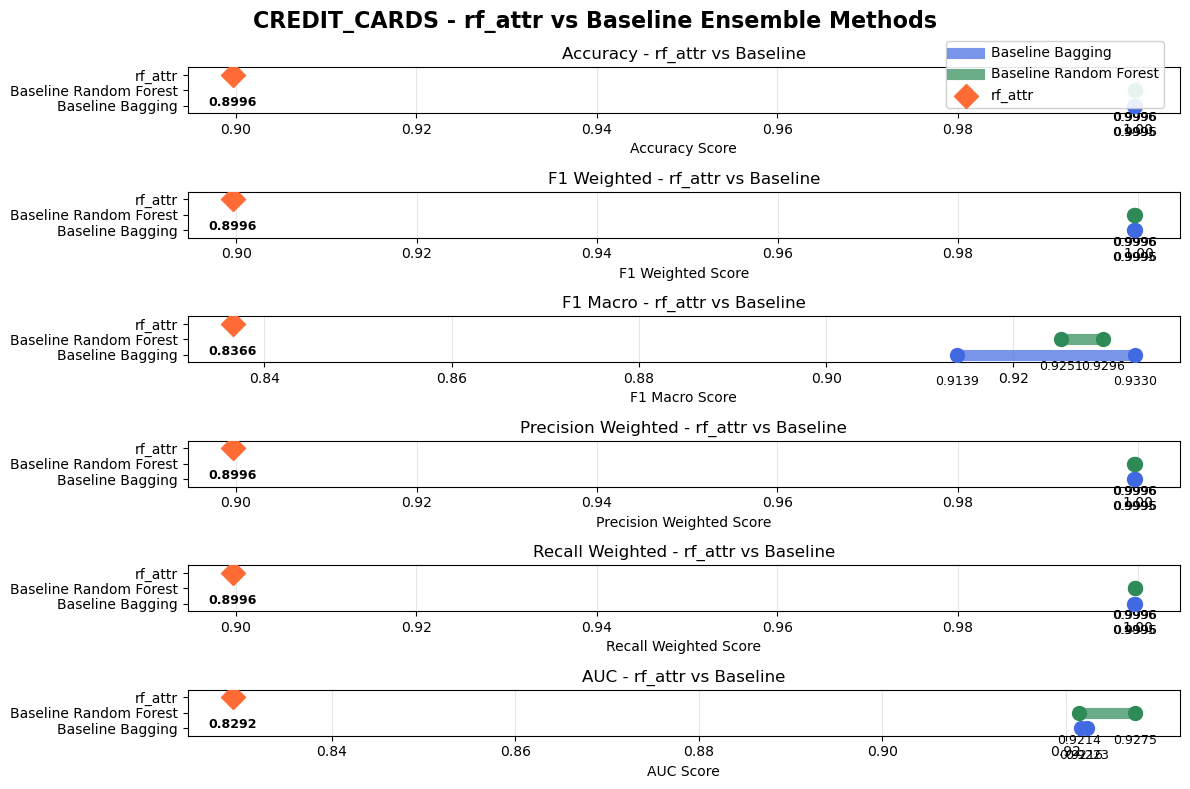

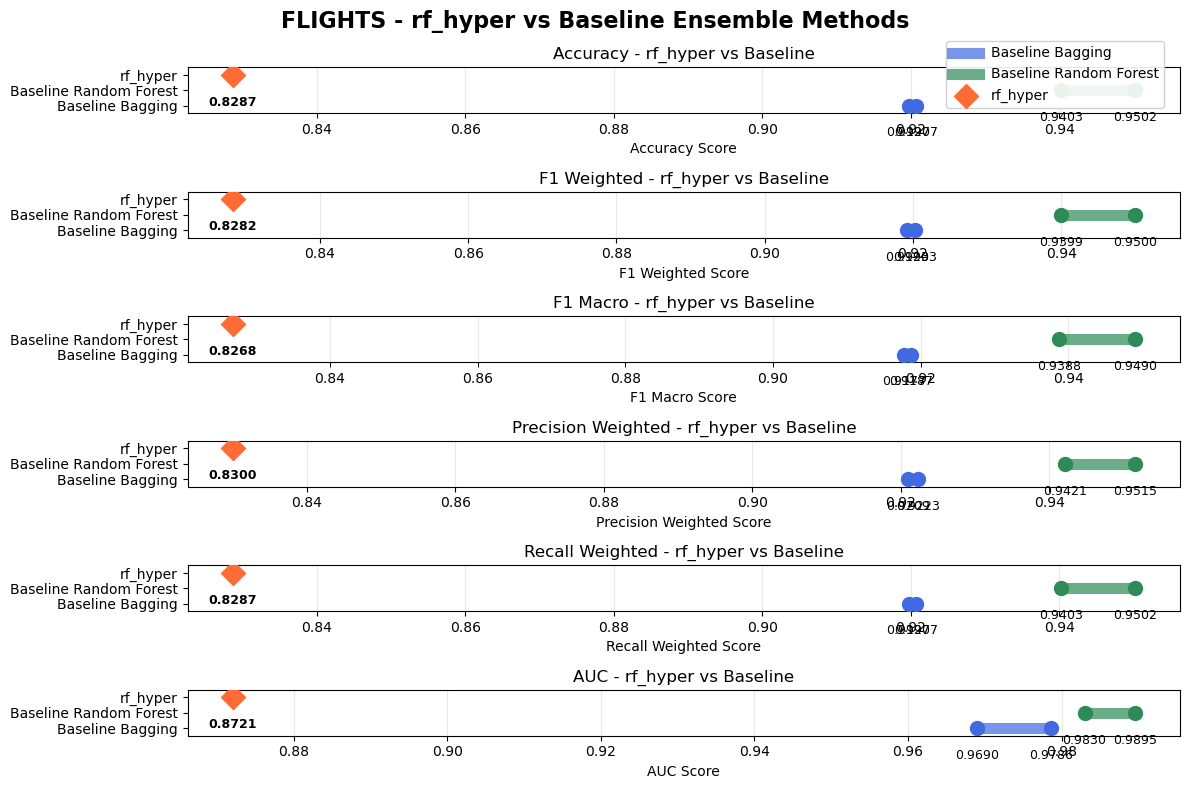

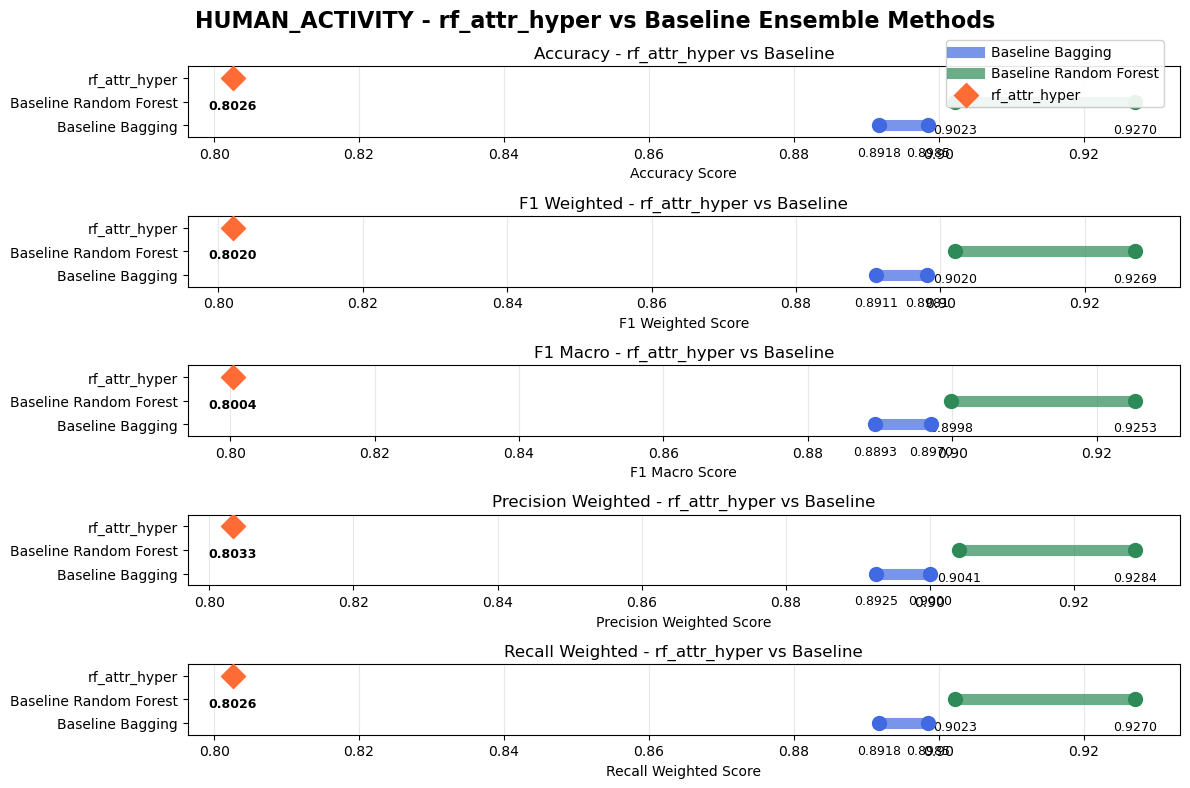

In [7]:
from src.utils.results_visualizer import EnsembleResultsVisualizer
from matplotlib import pyplot as plt

visualizer = EnsembleResultsVisualizer(results_dir="results")

# Load data and show summary
print("üìä Loading data...")
visualizer.load_data()
visualizer.show_summary_stats()

print("\n" + "=" * 50)
print("üìà Creating custom experiment comparison plots...")

# Create custom experiment comparison plots
custom_figures = visualizer.create_custom_experiment_plots(save_plots=True)

# Display the plots
total_custom = sum(len(figs) for figs in custom_figures.values()) if custom_figures else 0

if custom_figures:
    print(f"\n‚úÖ Created {total_custom} custom comparison plots!")
    print("üñºÔ∏è  Displaying plots...")
    
    # Show custom experiment plots
    for dataset, dataset_figs in custom_figures.items():
        for experiment, fig in dataset_figs.items():
            fig.show()
            
    plt.show()
else:
    print("‚ö†Ô∏è  No plots were created. Check your data and try again.")